# GHCN-Daily

A set of Python tools to make it easier to work with station data from [Global Historical Climatology Network Daily (GHCND)](https://www.ncdc.noaa.gov/ghcn-daily-description).

Extract variable/element of interest from the
Global Historical Climatology Network Daily (GHCND)

To run this you will need the GHCN-D '.dly' file for your chosen 
station (see https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt)

More information on the data can be found here:
https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt


## Example

In [1]:
import numpy as np
import pandas as pd
from get_station_data import ghcnd

In [2]:
'''
1. Find Station Names from Here:
    https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt
2. Download station file (for example...)
    wget ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/all/CHM00057516.dly .
'''

### Choose a station (by name, lon/lat etc)
stn_md = ghcnd.get_stn_metadata()
my_stn = stn_md[ stn_md['name'] == 'CHONGQING' ].iloc[0]

### Name of original daily data file from GHCN-D
filename = my_stn['station']+'.dly' 

### Extract all data into a labelled numpy array
df = ghcnd.create_DataFrame('raw_data/'+filename)

### Filter data for, e.g., a single variable
var = 'TMIN'
df = df[ df['element'] == var ]

### Tidy up columns
df = df.rename(index=str, columns={"value": var})
df = df.drop(['element'], axis=1)

### Add metadata
df = ghcnd.add_metadata(df, stn_md)

PRCP values have been divided by ten as specified by readme.txt
TMAX values have been divided by ten as specified by readme.txt
TMIN values have been divided by ten as specified by readme.txt


In [3]:
df.drop(columns=['mflag','qflag','sflag']).head(n=10)

,station,year,month,day,TMIN,date,lat,lon,elev,name
620,CHM00057516,1951,1,1,6.1,1951-01-01,29.583,106.467,416.0,CHONGQING
621,CHM00057516,1951,1,2,4.3,1951-01-02,29.583,106.467,416.0,CHONGQING
622,CHM00057516,1951,1,3,3.0,1951-01-03,29.583,106.467,416.0,CHONGQING
623,CHM00057516,1951,1,4,8.3,1951-01-04,29.583,106.467,416.0,CHONGQING
624,CHM00057516,1951,1,5,8.9,1951-01-05,29.583,106.467,416.0,CHONGQING
625,CHM00057516,1951,1,6,8.4,1951-01-06,29.583,106.467,416.0,CHONGQING
626,CHM00057516,1951,1,7,7.7,1951-01-07,29.583,106.467,416.0,CHONGQING
627,CHM00057516,1951,1,8,10.5,1951-01-08,29.583,106.467,416.0,CHONGQING
628,CHM00057516,1951,1,9,4.0,1951-01-09,29.583,106.467,416.0,CHONGQING
629,CHM00057516,1951,1,10,3.2,1951-01-10,29.583,106.467,416.0,CHONGQING


In [4]:
### Save to file
name = '-'.join(np.unique(df['name'].values))    # in case there are more than one
stn  = '-'.join(np.unique(df['station'].values))
df.to_csv(name+'_'+stn+'_'+var+'_GHCN-D.csv', index=False)

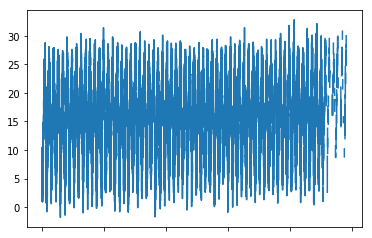

In [15]:
df['TMIN'].plot()

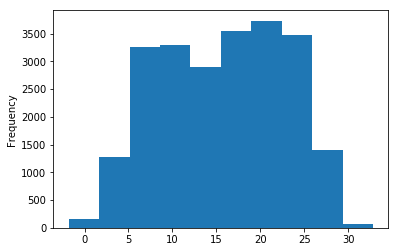

In [16]:
df['TMIN'].plot.hist()